In [2]:
from ipywidgets import widgets, interact, fixed
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import locale
import sys 
import os 
import matplotlib.pyplot as plt

# Add the higher-level directory containing the module to the sys.path 
module_path = os.path.abspath(os.path.join('..', 'libs')) 
if module_path not in sys.path: 
    sys.path.append(module_path) # Import the class from the module from your_module import


from ReportData import *
from ReportGraphs import *

# Set locale to US English for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
# setup reports class
ReportsClass = ReportData(copy_file=False,use_copied_file=False)

## Report Parameters

In [3]:
# Dropdown menu
year_dropdown = widgets.Dropdown(
    options=ReportsClass.year_list,
    value=ReportsClass.current_year,
    description='Select Year:',
)

quarter_dropdown = widgets.Dropdown(
    options=[1,2,3,4],
    value=ReportsClass.current_quarter,
    description='Select Quarter:',
)

## 401k Contribution Tracker

In [4]:

def yearly_progress(selected_year,selected_quarter):
    owner= "Robert"
    current_contributions, contributions_goal, yearly_contributions, previous_contributions = ReportsClass.get_retirement_progress_balances(year=selected_year, owner=owner, quarter=selected_quarter)
    retirement_progress_bar(current_contributions,contributions_goal, yearly_contributions, owner, selected_year, selected_quarter, previous_contributions )

    owner= "Amanda"
    current_contributions, contributions_goal, yearly_contributions, previous_contributions = ReportsClass.get_retirement_progress_balances(year=selected_year, owner=owner, quarter=selected_quarter)
    retirement_progress_bar(current_contributions,contributions_goal, yearly_contributions, owner, selected_year, selected_quarter, previous_contributions )


  
interactive_plots = widgets.interactive(yearly_progress, selected_year=year_dropdown, selected_quarter=quarter_dropdown)

# Display the interactive plot only (this includes the dropdown)
display(interactive_plots)

interactive(children=(Dropdown(description='Select Year:', options=(2024, 2023, 2022, 2021, 2020, 2019, 2018, …

## 401k Compare Last Year

In [8]:

def yearly_progress(selected_year):
    
    owner= "Robert"
    df = ReportsClass.get_yearly_contributions_left(type='401k', owner=owner, year=selected_year)
    bar_chart_contributions_left(df, selected_year, selected_year-1, '401k', owner)

    owner= "Amanda"
    df = ReportsClass.get_yearly_contributions_left(type='401k', owner=owner, year=selected_year)
    bar_chart_contributions_left(df, selected_year, selected_year-1, '401k', owner)

interactive_plots = widgets.interactive(yearly_progress, selected_year=year_dropdown)

# Display the interactive plot only (this includes the dropdown)
display(interactive_plots)


interactive(children=(Dropdown(description='Select Year(s):', index=2, options=(2024, 2023, 2022, 2021, 2020, …

## HSA Year Contributions Left

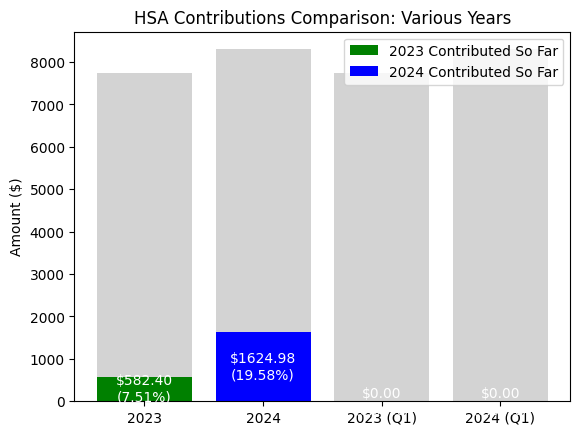

In [9]:
df = ReportsClass.get_yearly_contributions_left(type='HSA')
bar_chart_contributions_left(df, ReportsClass.current_year, ReportsClass.previous_year, 'HSA')